In [1]:
#Import pandas so we can import our video game file
#Jupyter Lab 3.44, Python 3
#If you do not have the packahes available to your machine, please follow the usual procedures for dowbloading, and then run the imports again
import pandas as pd
df = pd.read_csv(r'C:\Users\e202271009\Documents\D214\vgsales.csv')
#Your path will be different
#Import Other Packages, these packages allow us to perform statistical analysis and plot visuals for our data set
import numpy as np
import scipy as sp
import scipy.stats as stats
import pylab
from statsmodels.formula.api import ols
import statistics
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn as sb
# Scikit
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Let's view the dataset
#View Data Types
print(df.select_dtypes(include="float").info())
print(df.select_dtypes(include="integer").info())
print(df.select_dtypes(include="object").info())

#View exaample of the information in the dataset
print(df.head(5))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          16327 non-null  float64
 1   NA_Sales      16598 non-null  float64
 2   EU_Sales      16598 non-null  float64
 3   JP_Sales      16598 non-null  float64
 4   Other_Sales   16598 non-null  float64
 5   Global_Sales  16598 non-null  float64
dtypes: float64(6)
memory usage: 778.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rank    16598 non-null  int64
dtypes: int64(1)
memory usage: 129.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       16598 non-null  object
 1   Platform   16

In [3]:
#Check for any missing values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
# Remove nulls from where it says “True” above this cell
df = df.dropna(subset=['Year', 'Publisher'])

In [5]:
#Check for any missing values
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
#Drop irrelevant columns from the dataset
df = df.drop(['Name'], axis=1)

In [7]:
for col in df:
    print(df[col].unique())

[    1     2     3 ... 16598 16599 16600]
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000. 1995. 2016. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive'

In [8]:
#Now we need to convert our categorical data into numeric data using the label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Platform'])
print(label)
df.drop("Platform", axis=1, inplace=True)
df["Platform"] = label
df

[26 11 26 ... 16  4  6]


,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform
0,1,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,26
1,2,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,11
2,3,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,26
3,4,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,26
4,5,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5
...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,6
16594,16597,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,7
16595,16598,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,16
16596,16599,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,4


In [9]:
#Next variable
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label2 = le2.fit_transform(df['Genre'])
print(label2)
df.drop("Genre", axis=1, inplace=True)
df["Genre"] = label2
df

[10  4  6 ...  6  5  4]


,Rank,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Genre
0,1,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,26,10
1,2,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,11,4
2,3,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,26,6
3,4,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,26,10
4,5,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,5,7
...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,Kemco,0.01,0.00,0.00,0.00,0.01,6,4
16594,16597,2003.0,Infogrames,0.01,0.00,0.00,0.00,0.01,7,8
16595,16598,2008.0,Activision,0.00,0.00,0.00,0.00,0.01,16,6
16596,16599,2010.0,7G//AMES,0.00,0.01,0.00,0.00,0.01,4,5


In [10]:
#Now we need to convert our categorical data into numeric data using the label encoder
from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
label3 = le3.fit_transform(df['Genre'])
print(label3)
df.drop("Publisher", axis=1, inplace=True)
df["Publisher"] = label3
df

[10  4  6 ...  6  5  4]


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,26,10,10
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,11,4,4
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,26,6,6
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,26,10,10
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,5,7,7
...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01,6,4,4
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01,7,8,8
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01,16,6,6
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01,4,5,5


In [11]:
#Mean Values in the Distribution
print (df.mean())
#Median Values in the Distribution)
print (df.median())

Rank            8290.190228
Year            2006.405561
NA_Sales           0.265647
EU_Sales           0.147731
JP_Sales           0.078833
Other_Sales        0.048426
Global_Sales       0.540910
Platform          15.812841
Genre              4.928611
Publisher          4.928611
dtype: float64
Rank            8292.00
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
Platform          16.00
Genre              5.00
Publisher          5.00
dtype: float64


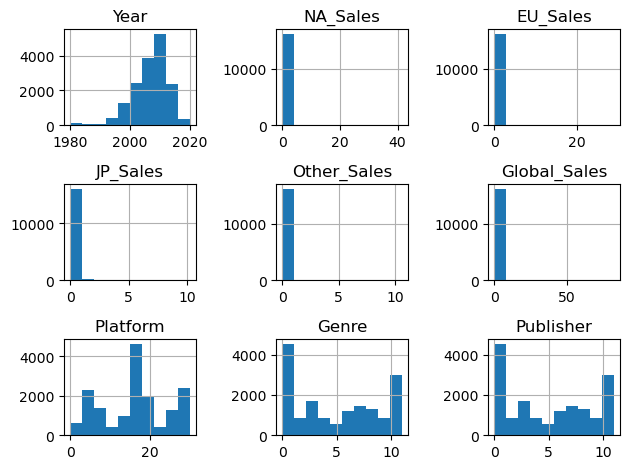

In [12]:
#Create Histograms to view our variables
df[['Year' , 
          'NA_Sales' , 
          'EU_Sales' , 
          'JP_Sales' , 
          'Other_Sales' , 
          'Global_Sales' , 
          'Platform' , 'Genre' , 'Publisher']].hist()
mpl.savefig('churn_hists.jpg')
mpl.tight_layout()

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


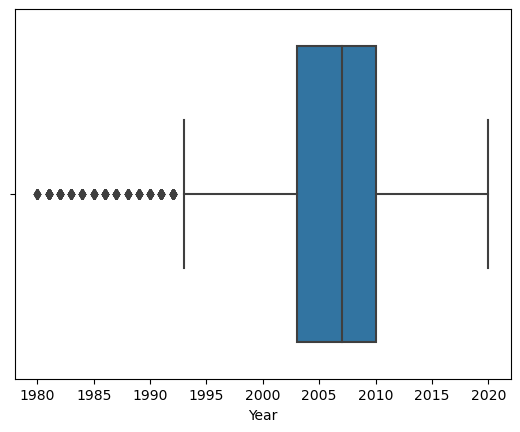

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


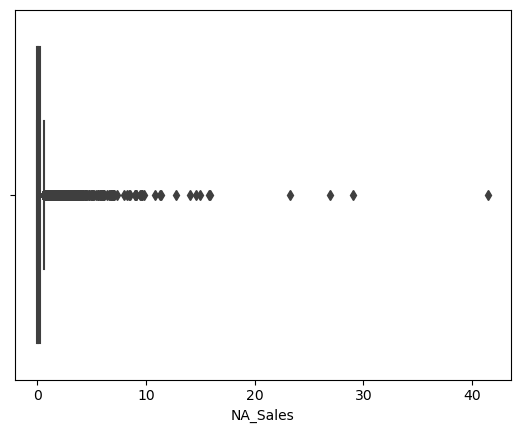

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


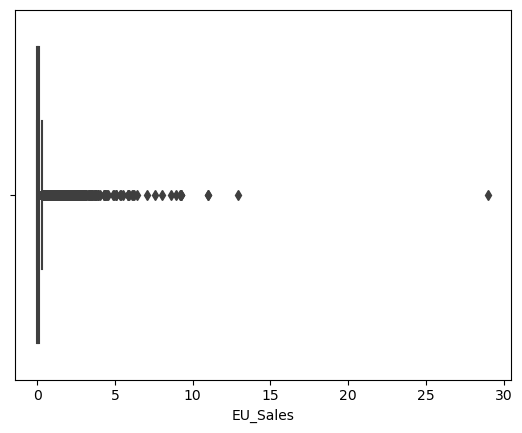

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


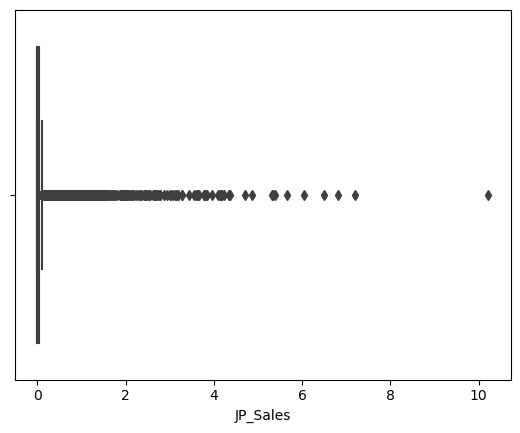

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


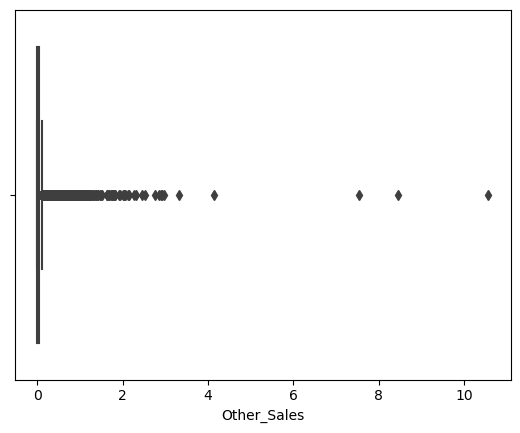

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


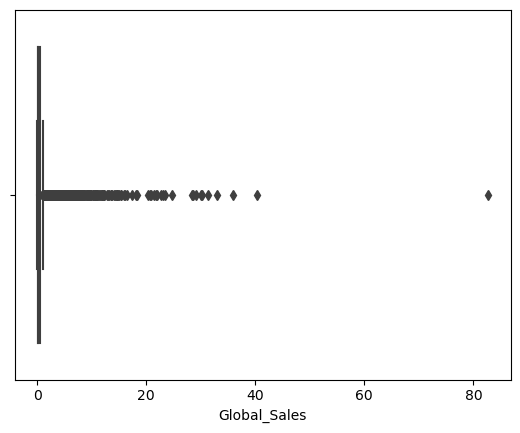

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


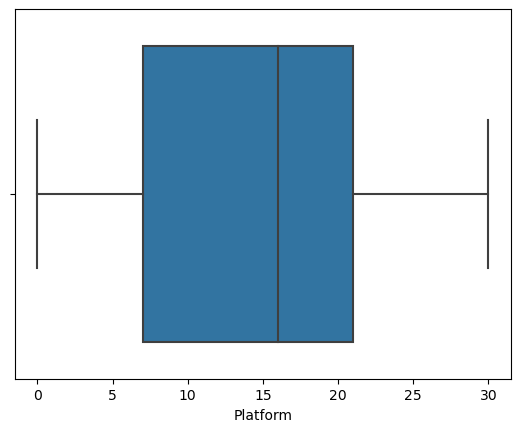

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


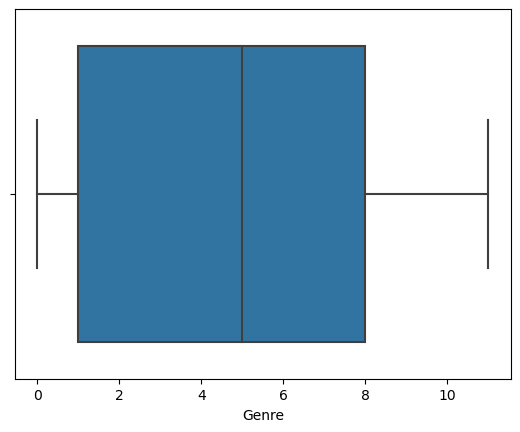

C:\Users\e202271009\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


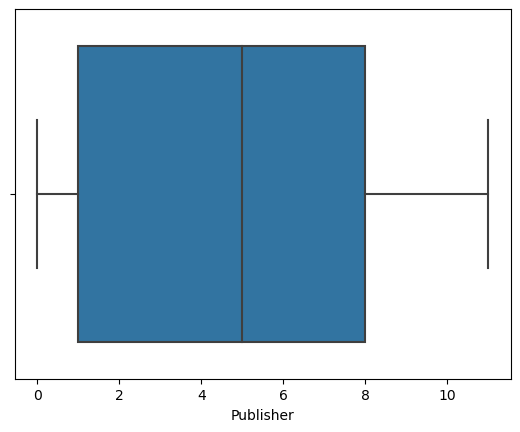

In [13]:
#Create Boxplots for our continuous variables
sb.boxplot('Year' , data = df)
mpl.show()

sb.boxplot('NA_Sales' , data = df)
mpl.show()

sb.boxplot('EU_Sales' , data = df)
mpl.show()

sb.boxplot('JP_Sales' , data = df)
mpl.show()

sb.boxplot('Other_Sales' , data = df)
mpl.show()

sb.boxplot('Global_Sales' , data = df)
mpl.show()

sb.boxplot('Platform' , data = df)
mpl.show()

sb.boxplot('Genre' , data = df)
mpl.show()

sb.boxplot('Publisher' , data = df)
mpl.show()

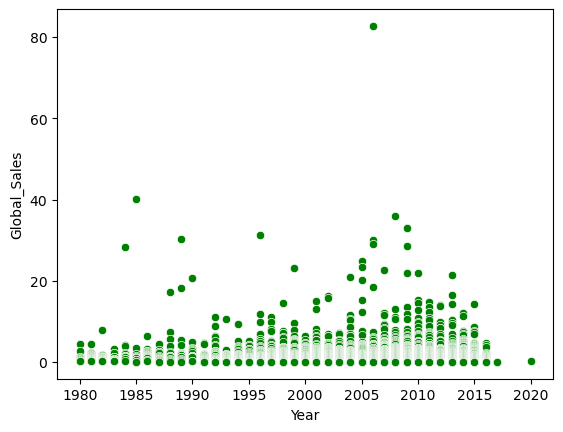

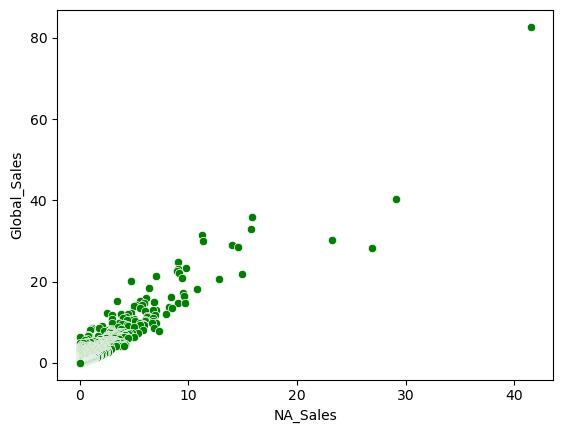

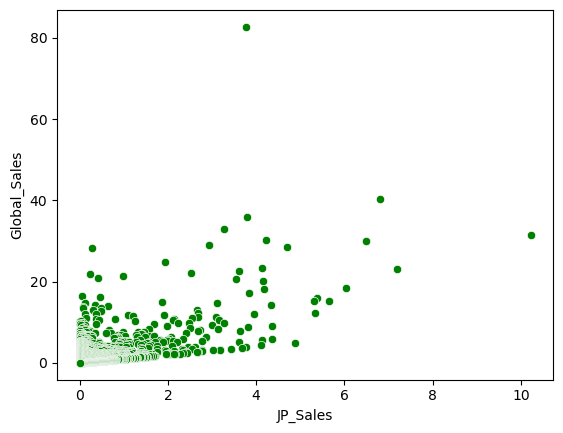

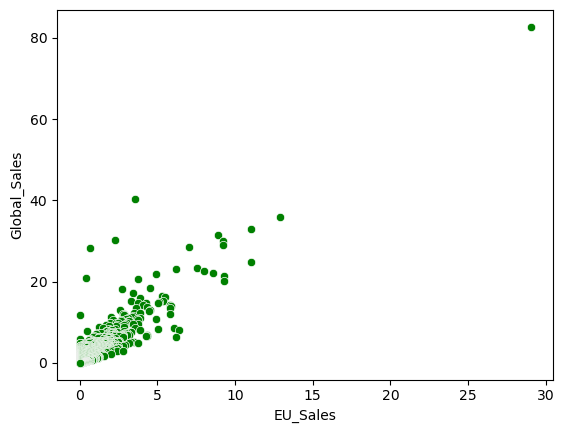

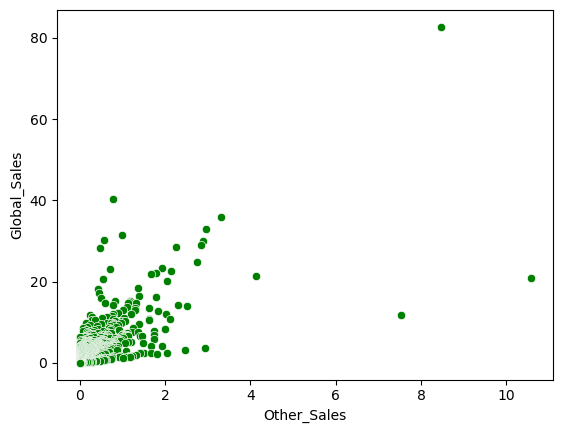

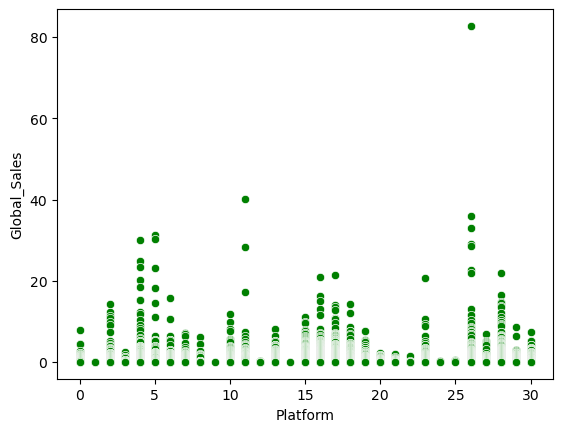

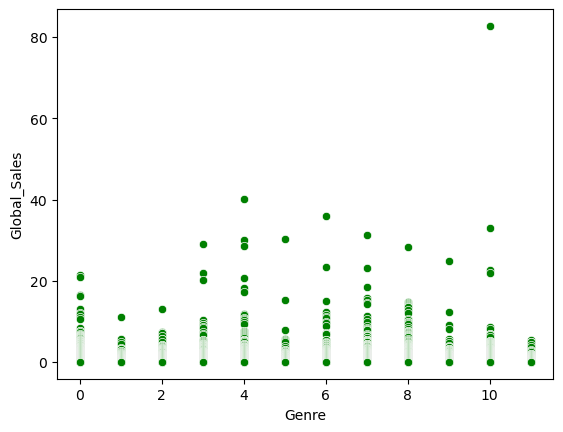

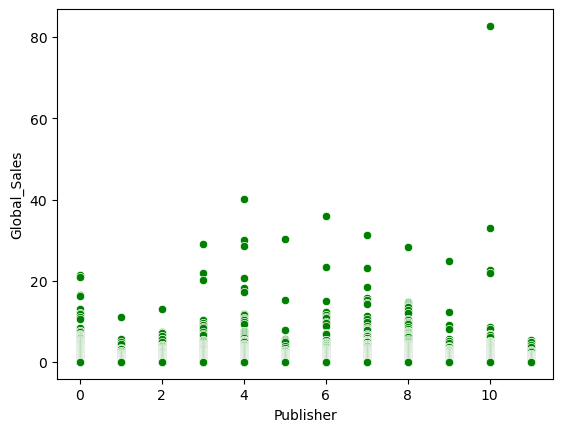

In [14]:
#Scatterplots to show direct or inverse relationships between the target & independent variables
sb.scatterplot(x=df['Year'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['NA_Sales'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['JP_Sales'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['EU_Sales'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['Other_Sales'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['Platform'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['Genre'], y=df['Global_Sales'],
                color='green')
mpl.show()
sb.scatterplot(x=df['Publisher'], y=df['Global_Sales'],
                color='green')
mpl.show()

In [15]:
df.to_csv('Sales_Cleaned.csv', index = False)

In [16]:
# Create initial estimated regression equation that could be used to predict Global_Sales, given the continuous and categorical variables
LMR = ols("Global_Sales ~ Year + Publisher + Platform + NA_Sales + EU_Sales + JP_Sales + Other_Sales + Genre", data=df).fit()
print(LMR.params)
print(LMR.summary())

Intercept      6.994607e-03
Year          -3.251709e-06
Publisher     -6.028122e-07
Platform      -9.288370e-06
NA_Sales       9.999536e-01
EU_Sales       9.999913e-01
JP_Sales       9.998387e-01
Other_Sales    9.996273e-01
Genre         -6.028122e-07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.095e+08
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:17:09   Log-Likelihood:                 62490.
No. Observations:               16291   AIC:                        -1.250e+05
Df Residuals:                   16283   BIC:                        -1.249e+05
Df Model:                           7                                         
Covariance Type:      

In [17]:
#Try again without the other sales information
LMR = ols("Global_Sales ~ Year + Publisher + Platform + Genre", data=df).fit()
print(LMR.params)
print(LMR.summary())

Intercept    43.608796
Year         -0.021537
Publisher     0.002306
Platform      0.007691
Genre         0.002306
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     40.34
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           5.80e-26
Time:                        10:17:11   Log-Likelihood:                -30376.
No. Observations:               16291   AIC:                         6.076e+04
Df Residuals:                   16287   BIC:                         6.079e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [18]:
#Stepwise Backwards reduction with a P value cutoff of p > .05 from the regression models and p values in the output above ^
#After removing all variables with a P value > .05, we are left with the following variables: Year, Platform, All of the other sales information

In [19]:
#Now we will use Variance Inflation Factor (VIF) to reduce our model. For the output, any VIF above 3 should be removed from the model due to an unreliable p score. Usually, it is anything above 5 with room for interpretation, but we need a stricter cutoff, so 3 was chosen.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Global_Sales ~ Year + Platform + NA_Sales + EU_Sales + JP_Sales + Other_Sales', data = df, return_type='dataframe')

#calculate VIF for each explanatory variable
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['variable'] = X.columns

#view VIF for each explanatory variable 
VIF

,VIF,variable
0,127983.692443,Intercept
1,1.082921,Year
2,1.040894,Platform
3,2.690268,NA_Sales
4,3.319718,EU_Sales
5,1.340652,JP_Sales
6,2.206489,Other_Sales


In [20]:
# Evcerything above 3 VIF was removed to have a very strict cutoff

Intercept     -9.174632
Year           0.004572
Platform       0.000382
NA_Sales       1.292622
JP_Sales       1.194827
Other_Sales    2.042369
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 9.911e+04
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:17:21   Log-Likelihood:                -2352.8
No. Observations:               16291   AIC:                             4718.
Df Residuals:                   16285   BIC:                             4764.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P

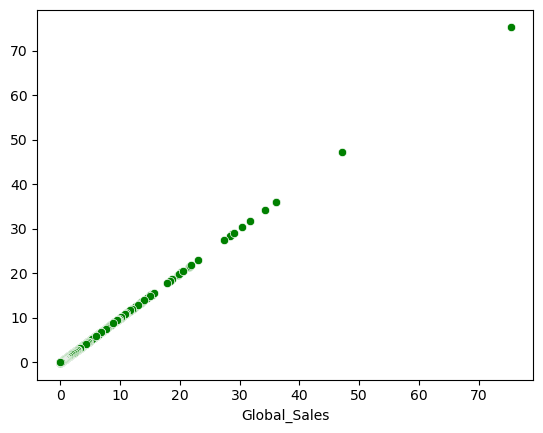

In [21]:
# Create reduced OLS multiple regression using the ols feature. We are compiling our final regression using the variables from the RFE
LM_Reduced = ols("Global_Sales ~ Year + Platform + NA_Sales + JP_Sales + Other_Sales", data=df).fit()
print(LM_Reduced.params)
print(LM_Reduced.summary())

# Extract Clean dataset
df.to_csv('Capstone_Data.csv')

Residuals = df['Global_Sales'] = LM_Reduced.predict(df[['Global_Sales', 'Year', 'Platform', 'NA_Sales', 'JP_Sales', 'Other_Sales']])
sb.scatterplot(x=df['Global_Sales'],y=Residuals,color='green')
mpl.show()

In [22]:
# Here we are calculating our residual error from the reduced model
print(np.sqrt(LM_Reduced.mse_resid))

0.2796173489745299


Intercept    44.427467
Year         -0.021935
Platform      0.007792
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     61.49
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.49e-27
Time:                        10:17:27   Log-Likelihood:                -30112.
No. Observations:               16291   AIC:                         6.023e+04
Df Residuals:                   16288   BIC:                         6.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

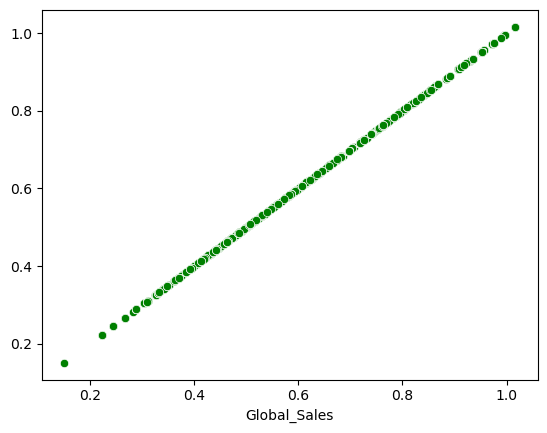

In [23]:
# Create reduced OLS multiple regression using the ols feature without other sales information. We are compiling our final regression using the variables from the RFE
LM_Reduced = ols("Global_Sales ~ Year + Platform", data=df).fit()
print(LM_Reduced.params)
print(LM_Reduced.summary())

# Extract Clean dataset
df.to_csv('Capstone_Data.csv')

Residuals = df['Global_Sales'] = LM_Reduced.predict(df[['Global_Sales', 'Year', 'Platform']])
sb.scatterplot(x=df['Global_Sales'],y=Residuals,color='green')
mpl.show()

In [24]:
# Here we are calculating our residual error from the reduced model
print(np.sqrt(LM_Reduced.mse_resid))

1.536513586801373


In [25]:
df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,0.629189,26,10,10
1,2,1985.0,29.08,3.58,6.81,0.77,0.972930,11,4,4
2,3,2008.0,15.85,12.88,3.79,3.31,0.585319,26,6,6
3,4,2009.0,15.75,11.01,3.28,2.96,0.563385,26,10,10
4,5,1996.0,11.27,8.89,10.22,1.00,0.684895,5,7,7
...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.561079,6,4,4
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.546937,7,8,8
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.507395,16,6,6
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.370017,4,5,5
